In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('customer_churn_large_dataset.csv')

In [8]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [10]:
df.shape

(100000, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [14]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [16]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [19]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [15]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [17]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

# Visualize the count of customer churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

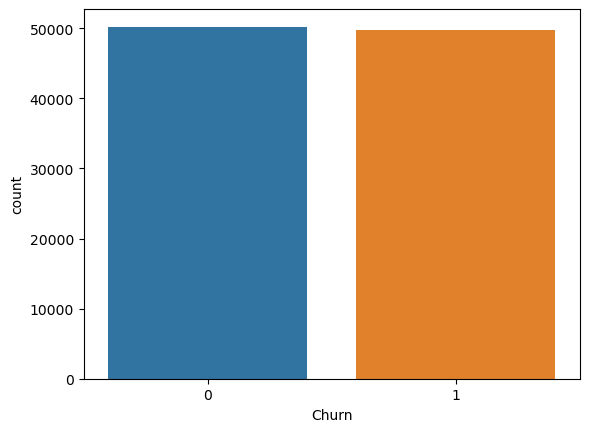

In [18]:
sns.countplot(df['Churn'])

# Visualize the churn count for both males and females

<AxesSubplot:xlabel='Gender', ylabel='count'>

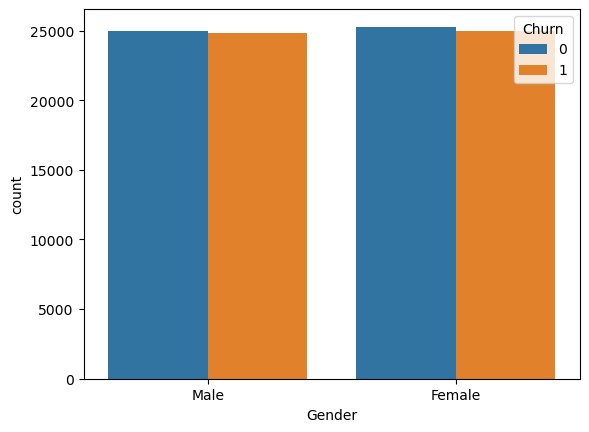

In [23]:
sns.countplot(x ='Gender', hue='Churn', data=df)

# Visualize the churn count for the Subscription Length in a month

<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='count'>

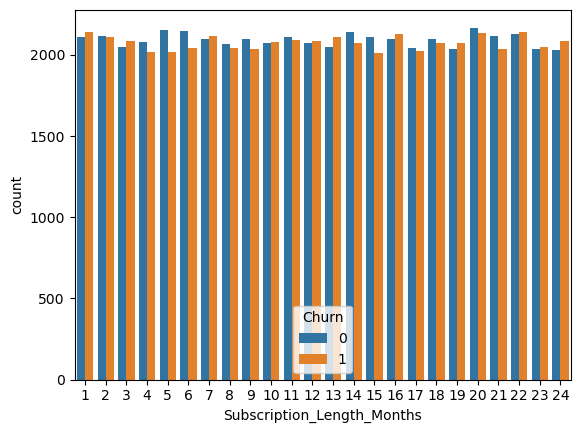

In [25]:
sns.countplot(x='Subscription_Length_Months', hue='Churn', data=df)

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# To remove unnecessary columns



In [32]:
cleanDF = df.drop('CustomerID', axis=1)

# Convert all the non-numeric columns to numeric


In [35]:
for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

In [36]:
cleanDF.dtypes

Name                            int32
Age                             int64
Gender                          int32
Location                        int32
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [37]:
cleanDF.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,45,1,2,16,73.36,186,0
1,11112,44,0,4,0,48.76,122,0
2,22223,6,0,2,4,85.47,410,0
3,33334,18,0,3,2,97.94,247,1
4,44445,28,0,3,18,58.14,216,0


# Scale the Data

In [38]:
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

# Split the data into 80% Training and 20% Testing

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Doing HyperParameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [65]:
lr=GridSearchCV(lr_model,param_grid=parameter,scoring='accuracy',cv=5)

In [66]:
lr.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [67]:
print(lr.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [68]:
print(lr.best_score_)

0.5019374999999999


# Create and Train the model using Logistics Regression

In [51]:
lr_model = LogisticRegression()
lr_model.fit(xtrain,ytrain)
accuracy_lr = lr_model.score(xtest,ytest)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.50205


# Create the predictions on the test data

In [58]:
predictions = model.predict(xtest)

# print the predictions
print(predictions)

[0 1 0 ... 1 0 0]


# And Finally check the precision, recall and f1-score

In [52]:
lr_pred= lr_model.predict(xtest)
report = classification_report(ytest,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



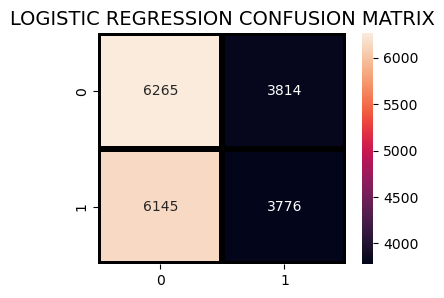

In [55]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(ytest, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [48]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x, y)

# Make predictions
prediction_test = model_rf.predict(xtest)
print (metrics.accuracy_score(ytest, prediction_test))

0.55625


In [50]:
print(classification_report(ytest, prediction_test))

              precision    recall  f1-score   support

           0       0.54      0.76      0.63     10079
           1       0.59      0.35      0.44      9921

    accuracy                           0.56     20000
   macro avg       0.57      0.55      0.54     20000
weighted avg       0.57      0.56      0.54     20000



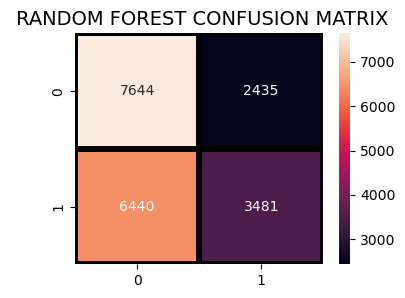

In [54]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(ytest, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()